<a href="https://colab.research.google.com/github/suhyun6363/what_your_personal_color/blob/classification/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe==0.10.8
!pip install mediapipe opencv-python
!pip install numpy matplotlib scikit-learn
!pip install imageio
!pip install numpy matplotlib
!pip install colormath

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39405 sha256=820723ed0ae09a3c00e033110d292e00bc5dbaed8ce42e08b3fbd3a427fce2dd
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath


<ipython-input-21-6be436c77967>:104: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


=============================전체 클러스터 중심값=============================
Cluster 1 Center (RGB): [182.88180301 120.83973289  93.44156928]
Cluster 2 Center (RGB): [113.35995232  68.93146603  51.87187128]
Cluster 3 Center (RGB): [203.7005939  150.39954946 124.80094204]
Cluster 4 Center (RGB): [75.30552147 44.32638037 32.05276074]
Cluster 5 Center (RGB): [143.28839779  87.8320442   67.61077348]
Cluster 6 Center (RGB): [193.86171983 134.71359223 106.80693481]
Cluster 7 Center (RGB): [165.15085049 104.0713966   79.587735  ]
Cluster 8 Center (RGB): [212.74432296 170.47518923 151.57611438]
=============================전체 클러스터 픽셀수=============================
Cluster 6 Size: 7214 pixels
Cluster 3 Size: 4886 pixels
Cluster 1 Size: 6007 pixels
Cluster 8 Size: 1189 pixels
Cluster 7 Size: 4464 pixels
Cluster 5 Size: 3615 pixels
Cluster 2 Size: 1663 pixels
Cluster 4 Size: 815 pixels
전체 픽셀 수: 29853
=============================Color distance계산=============================
가장 픽셀 수가 많은 클러스터: 6
첫 번째로 Colo

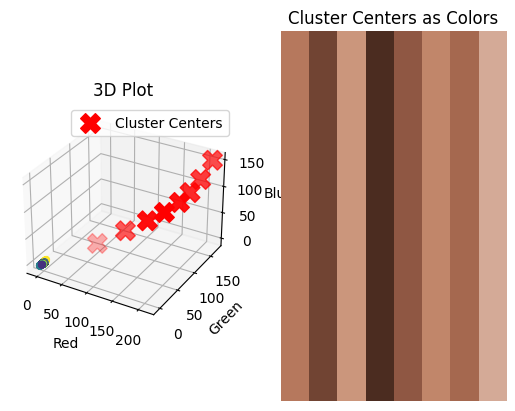

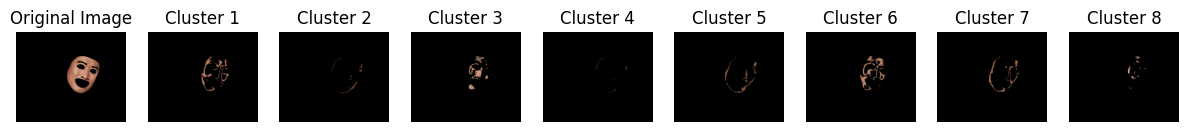

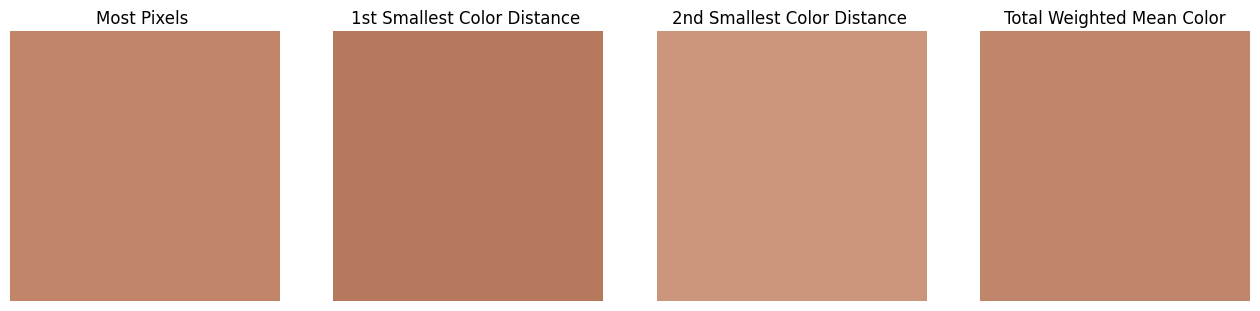

=============================변환=============================
평균 RGB 값: [192.85596731 134.32407356 107.21212791]
Lab: L=61.243266139681396, a=19.15265421548723, b=23.57766514871407
HSV: H=18.993972605566455, S=0.44408187413499767, V=75.63
이미지 저장경로: /content/cluster_images


In [21]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh



# 이미지 파일의 경우를 사용하세요.
IMAGE_FILES = ["/content/202308162321001125_0.jpg"]

with mp.solutions.face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5) as face_mesh:

    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        # 작업 전에 BGR 이미지를 RGB로 변환합니다.
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # 이미지에 출력하고 그 위에 얼굴 그물망 경계점을 그립니다.
        if not results.multi_face_landmarks:
            continue

        annotated_image = image.copy()

        for face_landmarks in results.multi_face_landmarks:
            # 얼굴 전체에 대한 랜드마크 그리기
            for landmark in face_landmarks.landmark:
                x, y = int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])
                #cv2.circle(annotated_image, (x, y), 1, (0, 255, 0), 1)

            # 얼굴의 왼쪽 눈과 오른쪽 눈을 검정색으로 채우기

            # eye indices
            left_eye = [243, 190, 56, 28, 27, 29, 30, 247, 226, 31, 228, 229, 230, 231, 232, 233, 243]
            right_eye = [463, 453, 452, 451, 450, 449, 448, 261, 446, 467, 260, 259, 257, 258, 286, 414, 463]
            # eyebrow indices
            left_eyebrow = [336, 296, 334, 293, 300, 276, 283, 282, 295, 285]
            right_eyebrow = [70, 63, 105, 66, 107, 55, 65, 52, 53, 46]
            # lips indices
            # lips = [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291, 375, 321, 405, 314, 17, 84, 181, 91, 146, 61]
            lips = [164, 393, 391, 322, 410, 287, 273, 335, 406, 313, 18,83, 182, 106, 43, 57, 186, 92, 165, 167]
            # nostril indices
            left_nostril = [218, 239, 241, 242, 99, 240, 235, 219]
            right_nostril = [438, 439, 455, 460, 328, 462, 458, 459]
            # face indices
            face_outline = [10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 172, 58, 132, 93, 234, 127, 162, 21, 54, 103, 67, 109]

            left_eye_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in left_eye])
            right_eye_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in right_eye])
            left_eyebrow_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in left_eyebrow])
            right_eyebrow_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in right_eyebrow])
            lip_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in lips])
            left_nostril_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in left_nostril])
            right_nostril_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in right_nostril])
            face_outline_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in face_outline])


             # 얼굴 윤곽선 바깥 영역을 검정색으로 채우기
            mask = np.zeros_like(annotated_image)
            outside_mask = cv2.fillPoly(mask, [face_outline_points], (255, 255, 255))

             # 얼굴 부분만을 따로 잘라내기
            face_only = cv2.bitwise_and(image, outside_mask)

            # 얼굴 윤곽선 바깥 영역을 검정색으로 채우기
            inside_mask = np.zeros_like(annotated_image)
            inside_mask = cv2.fillPoly(inside_mask, [face_outline_points], (255, 255, 255))

            # 얼굴 부분만을 따로 잘라내기
            face_inside = cv2.bitwise_and(image, inside_mask)


            cv2.fillConvexPoly(face_only, left_eye_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, right_eye_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, left_eyebrow_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, right_eyebrow_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, lip_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, left_nostril_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, right_nostril_points, color=(0, 0, 0))

        cv2.imwrite('/content/face_analysis' + str(idx) + '.png', face_only)
        cv2.imwrite('/content/face_draping' + str(idx) + '.png', face_inside)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from collections import Counter
import imageio

from collections import Counter
from colormath.color_objects import sRGBColor, LabColor, HSVColor
from colormath.color_conversions import convert_color
import os

# 이미지 로드
image_path = "/content/face_analysis0.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 8
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

print(f'=============================전체 클러스터 중심값=============================')
for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

print(f'=============================전체 클러스터 픽셀수=============================')

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')

# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

# 가장 픽셀 수가 많은 클러스터 찾기
most_pixels_cluster = max(cluster_sizes, key=cluster_sizes.get)

# 첫 번째로 Color distance가 작은 클러스터 찾기
min_distance_1 = float('inf')
selected_cluster_1 = None

for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster:  # 가장 픽셀 수가 많은 클러스터는 제외
        current_distance = distance.euclidean(cluster_centers_rgb[most_pixels_cluster], center)
        if current_distance < min_distance_1:
            min_distance_1, selected_cluster_1 = current_distance, i

# 두 번째로 Color distance가 작은 클러스터 찾기
min_distance_2 = float('inf')
selected_cluster_2 = None

for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster and i != selected_cluster_1:  # 가장 픽셀 수가 많은 클러스터와 첫 번째로 선택된 클러스터는 제외
        current_distance = distance.euclidean(cluster_centers_rgb[most_pixels_cluster], center)
        if current_distance < min_distance_2:
            min_distance_2, selected_cluster_2 = current_distance, i

# 각 클러스터에 속하는 픽셀의 수를 RGB값에 곱한 뒤, 세 개의 클러스터의 픽셀 수로 나누어 평균 RGB 값을 계산
most_pixels_cluster_size = cluster_sizes[most_pixels_cluster]
selected_cluster_1_size = cluster_sizes[selected_cluster_1]
selected_cluster_2_size = cluster_sizes[selected_cluster_2]

most_pixels_rgb_sum = np.sum(face_data[optimal_cluster_labels == most_pixels_cluster], axis=0)
selected_cluster_1_rgb_sum = np.sum(face_data[optimal_cluster_labels == selected_cluster_1], axis=0)
selected_cluster_2_rgb_sum = np.sum(face_data[optimal_cluster_labels == selected_cluster_2], axis=0)

most_pixels_rgb_mean_weighted = most_pixels_rgb_sum / most_pixels_cluster_size
selected_cluster_1_rgb_mean_weighted = selected_cluster_1_rgb_sum / selected_cluster_1_size
selected_cluster_2_rgb_mean_weighted = selected_cluster_2_rgb_sum / selected_cluster_2_size

total_rgb_sum_weighted = (most_pixels_rgb_sum + selected_cluster_1_rgb_sum + selected_cluster_2_rgb_sum)
total_rgb_mean_weighted = total_rgb_sum_weighted / (most_pixels_cluster_size + selected_cluster_1_size + selected_cluster_2_size)

print(f'=============================Color distance계산=============================')

# 결과 출력
print(f'가장 픽셀 수가 많은 클러스터: {most_pixels_cluster + 1}')
print(f'첫 번째로 Color distance가 작은 클러스터: {selected_cluster_1 + 1}')
print(f'두 번째로 Color distance가 작은 클러스터: {selected_cluster_2 + 1}')
print(f'첫 번째 Color distance: {min_distance_1}')
print(f'두 번째 Color distance: {min_distance_2}')

print(f'=============================가중평균=============================')
print(f'가장 픽셀 수가 많은 클러스터의 가중 평균 RGB 값: {most_pixels_rgb_mean_weighted}')
print(f'첫 번째로 Color distance가 작은 클러스터의 가중 평균 RGB 값: {selected_cluster_1_rgb_mean_weighted}')
print(f'두 번째로 Color distance가 작은 클러스터의 가중 평균 RGB 값: {selected_cluster_2_rgb_mean_weighted}')
print(f'세개의 클러스터의 가중 평균 RGB 값: {total_rgb_mean_weighted}')


# 각 클러스터에 해당하는 이미지 생성 및 출력
fig, axes = plt.subplots(1, optimal_k + 1, figsize=(15, 3))

# 원본 이미지
axes[0].imshow(face_image)
axes[0].axis('off')
axes[0].set_title('Original Image')


for i in range(optimal_k):
    cluster_indices = np.where(optimal_cluster_labels == i)
    cluster_pixels = face_data[cluster_indices]
    cluster_image = np.zeros_like(face_data)
    cluster_image[cluster_indices] = cluster_pixels

    # 이미지 재구성
    cluster_image_reshaped = cluster_image.reshape(non_black_pixels.shape)
    result_image = np.zeros_like(face_image)
    result_image[~np.all(face_image == [0, 0, 0], axis=-1)] = cluster_image_reshaped

    axes[i + 1].imshow(result_image)
    axes[i + 1].axis('off')
    axes[i + 1].set_title(f'Cluster {i + 1}')



# 결과 색상 출력
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(most_pixels_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[0].set_title('Most Pixels ')
ax[0].axis('off')

ax[1].imshow(selected_cluster_1_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[1].set_title('1st Smallest Color Distance ')
ax[1].axis('off')

ax[2].imshow(selected_cluster_2_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[2].set_title('2nd Smallest Color Distance ')
ax[2].axis('off')

ax[3].imshow(total_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[3].set_title('Total Weighted Mean Color')
ax[3].axis('off')

plt.show()


print(f'=============================변환=============================')
# 평균 RGB 값 출력
print(f'평균 RGB 값: {total_rgb_mean_weighted}')

# RGB to Lab conversion
average_srgb = sRGBColor(total_rgb_mean_weighted[0], total_rgb_mean_weighted[1], total_rgb_mean_weighted[2], is_upscaled=True)
average_lab = convert_color(average_srgb, LabColor)

# 출력 Lab 값
print(f'Lab: L={average_lab.lab_l}, a={average_lab.lab_a}, b={average_lab.lab_b}')

# RGB to HSV conversion
average_hsv = convert_color(average_srgb, HSVColor)

# 출력 HSV 값
# s, v값은 비율입니당~
#print(f'HSV: H={average_hsv.hsv_h}, S={average_hsv.hsv_s}, V={average_hsv.hsv_v}')
print(f'HSV: H={average_hsv.hsv_h}, S={average_hsv.hsv_s}, V={average_hsv.hsv_v * 100:.2f}')

# L, b, S값 출력
#print(f'=============================LbS=============================')
#print(f' L={average_lab.lab_l}, b={average_lab.lab_b}, S={average_hsv.hsv_s}')



#교수님스미마셍
#출력결과 클러스터순서대로네요






#영역이미지 저장코드추가

# 이미지를 저장할 디렉토리
output_directory = "/content/cluster_images"
os.makedirs(output_directory, exist_ok=True)

# 클러스터 이미지 및 Total Weighted Mean Color 이미지 저장
for i, cluster_indices in enumerate([most_pixels_cluster, selected_cluster_1, selected_cluster_2]):
    cluster_pixels = face_data[optimal_cluster_labels == cluster_indices]
    cluster_image = np.zeros_like(face_data)
    cluster_image[optimal_cluster_labels == cluster_indices] = cluster_pixels

    # 이미지 재구성
    cluster_image_reshaped = cluster_image.reshape(non_black_pixels.shape)
    result_image = np.zeros_like(face_image)
    result_image[~np.all(face_image == [0, 0, 0], axis=-1)] = cluster_image_reshaped

    # 이미지 저장
    cluster_filename = os.path.join(output_directory, f'cluster_{i + 1}.png')
    imageio.imwrite(cluster_filename, result_image)

# Total Weighted Mean Color 이미지 저장
total_weighted_mean_color_image = np.zeros((50, 50, 3), dtype=np.uint8)
total_weighted_mean_color_image[:, :] = total_rgb_mean_weighted.astype(np.uint8)
total_weighted_mean_color_filename = os.path.join(output_directory, 'total_weighted_mean_color.png')
imageio.imwrite(total_weighted_mean_color_filename, total_weighted_mean_color_image)

# 메시지 출력
print(f'이미지 저장경로: {output_directory}')




In [64]:
#1번

import math

# L, b, s, v 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s * 100  # s 값
v_value = average_hsv.hsv_v * 100  # v 값

# 평균값에 따라 첫 번째 타입 분류
if v_value > 65.20 and b_value > 18.50 and s_value > 33:
    result = "Spring warm bright"
elif v_value > 65.20 and b_value > 18.50 and s_value <= 33:
    result = "Spring warm light"
elif v_value > 65.20 and b_value <= 18.50 and s_value <= 33:
    result = "Summer cool light"
elif v_value <= 65.20 and b_value <= 18.50 and s_value <= 33:
    result = "Summer cool mute"
elif v_value <= 65.20 and b_value > 18.50 and s_value <= 33:
    result = "Autumn warm mute"
elif v_value <= 65.20 and b_value > 18.50 and s_value > 33:
    result = "Autumn warm deep"
elif v_value <= 65.20 and b_value <= 18.50 and s_value > 33:
    result = "Winter cool deep"
elif v_value > 65.20 and b_value <= 18.50 and s_value > 33:
    result = "Winter cool bright"

# v_value - 65.20, b_value - 18.50, s_value - 0.33를 계산합니다.
diff_v = v_value - 65.20
diff_b = b_value - 18.50
diff_s = s_value - 33

# 절댓값 계산
abs_diff_v = abs(diff_v)
abs_diff_b = abs(diff_b)
abs_diff_s = abs(diff_s)

# 각각의 값과 절댓값 출력
print(f'diff_v: {diff_v}')
print(f'diff_b: {diff_b}')
print(f'diff_s: {diff_s}')

# Determine the smallest absolute difference among abs_diff_v, abs_diff_b, and abs_diff_s
min_diff = min(abs_diff_v, abs_diff_b, abs_diff_s)

# Calculate second_vbs based on the smallest absolute difference
if min_diff == abs_diff_v:
    second_vbs = f"({v_value - diff_v*2}, {b_value}, {s_value})"
elif min_diff == abs_diff_b:
    second_vbs = f"({v_value}, {b_value - diff_b*2}, {s_value})"
else:
    second_vbs = f"({v_value}, {b_value}, {s_value - diff_s*2})"


# Extracting values from the second_vbs string
second_vbs_values = second_vbs.strip('()').split(', ')

# Assigning values to new variables
new_v_value = float(second_vbs_values[0])
new_b_value = float(second_vbs_values[1])
new_s_value = float(second_vbs_values[2])

print(f'v_value: {v_value}')
print(f'b_value: {b_value}')
print(f's_value: {s_value}')
# Printing the new values
print(f'new_v_value: {new_v_value}')
print(f'new_b_value: {new_b_value}')
print(f'new_s_value: {new_s_value}')



# Applying the logic to new values
if new_v_value > 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Spring warm bright"
elif new_v_value > 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Spring warm light"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool light"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Autumn warm mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Autumn warm deep"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool deep"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool bright"



print(result)
print(second_result)



diff_v: 10.429791100181163
diff_b: 5.077665148714068
diff_s: 11.408187413499768
v_value: 75.62979110018117
b_value: 23.57766514871407
s_value: 44.40818741349977
new_v_value: 75.62979110018117
new_b_value: 13.422334851285932
new_s_value: 44.40818741349977
Spring warm bright
Winter cool bright


In [71]:
# 1번 정규화.ver

import math

# L, b, s, v 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s * 100  # s 값
v_value = average_hsv.hsv_v * 100  # v 값

# 평균값에 따라 첫 번째 타입 분류
if v_value > 65.20 and b_value > 18.50 and s_value > 33:
    result = "Spring warm bright"
elif v_value > 65.20 and b_value > 18.50 and s_value <= 33:
    result = "Spring warm light"
elif v_value > 65.20 and b_value <= 18.50 and s_value <= 33:
    result = "Summer cool light"
elif v_value <= 65.20 and b_value <= 18.50 and s_value <= 33:
    result = "Summer cool mute"
elif v_value <= 65.20 and b_value > 18.50 and s_value <= 33:
    result = "Autumn warm mute"
elif v_value <= 65.20 and b_value > 18.50 and s_value > 33:
    result = "Autumn warm deep"
elif v_value <= 65.20 and b_value <= 18.50 and s_value > 33:
    result = "Winter cool deep"
elif v_value > 65.20 and b_value <= 18.50 and s_value > 33:
    result = "Winter cool bright"



# Normalize values to the range [0, 1]
b_normalized = (b_value + 128) / 255.0  # Assuming b range is -128 to 127
v_normalized = v_value / 100.0
s_normalized = s_value / 100.0

# Calculate differences
normalized_diff_v = (v_normalized - 0.652)
normalized_diff_b = (b_normalized - 0.185)
normalized_diff_s = (s_normalized - 0.33)

# Determine the smallest absolute difference among normalized_diff_v, normalized_diff_b, and normalized_diff_s
min_diff = min(abs(normalized_diff_v), abs(normalized_diff_b), abs(normalized_diff_s))

# Calculate second_vbs based on the normalized differences
if min_diff == abs(normalized_diff_v):
    new_v_value = v_value - normalized_diff_v * 100 * 2
    new_b_value = b_value
    new_s_value = s_value
elif min_diff == abs(normalized_diff_b):
    new_v_value = v_value
    new_b_value = b_value - normalized_diff_b * 255 * 2
    new_s_value = s_value
else:
    new_v_value = v_value
    new_b_value = b_value
    new_s_value = s_value - normalized_diff_s * 100 * 2

# Applying the logic to new values
if new_v_value > 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Spring warm bright"
elif new_v_value > 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Spring warm light"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool light"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Autumn warm mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Autumn warm deep"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool deep"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool bright"


print(f'v_normalized: {v_normalized}')
print(f'b_normalized: {b_normalized}')
print(f's_normalized: {s_normalized}')
# Printing the new values
print(f'new_v_value: {new_v_value}')
print(f'new_b_value: {new_b_value}')
print(f'new_s_value: {new_s_value}')


print(f'========================')

# Print the results
print(result)
print(second_result)


v_normalized: 0.7562979110018117
b_normalized: 0.5944222162694669
s_normalized: 0.44408187413499767
new_v_value: 54.77020889981884
new_b_value: 23.57766514871407
new_s_value: 44.40818741349977
Spring warm bright
Autumn warm deep


In [65]:
# 2번

# D = 0.406 + (-0.140 × 왼쪽 볼 명도 L*) + (0.558 × 왼쪽 볼 황색도 b*)
def calculate_D(L, b):
    return 0.406 + (-0.140 * L) + (0.558 * b)

# D 값 기반 계절 유형 및 세컨드 유형 분류
def classify_season_types(L, b, s, v):
    # D 값 계산
    D_value = calculate_D(L, b)

    # 1차 계절 유형 분류
    season_types = {
        "봄 유형": -0.705,
        "여름 유형": -0.168,
        "가을 유형": 0.237,
        "겨울 유형": 0.276
    }
    best_season = min(season_types, key=lambda key: abs(D_value - season_types[key]))

    # 2차 계절 유형 분류
    if best_season == "봄 유형":
        best_subtype = "봄 브라이트" if s > 0.31 else "봄 라이트"
    elif best_season == "여름 유형":
        best_subtype = "여름 라이트" if v > 71 else "여름 뮤트"
    elif best_season == "가을 유형":
        best_subtype = "가을 뮤트" if s > 0.31 else "가을 딥"
    elif best_season == "겨울 유형":
        best_subtype = "겨울 브라이트" if v > 71 else "겨울 딥"
    else:
        best_subtype = "알 수 없음"

    # 세컨드 유형 계산
    # 세컨드 유형은 베스트 유형을 제외한 나머지 유형 중에서 가장 가까운 것으로 설정
    season_types.pop(best_season)
    second_season = min(season_types, key=lambda key: abs(D_value - season_types[key]))

    # 세컨드 유형에 따른 2차 계절 유형 분류
    if second_season == "봄 유형":
        second_subtype = "봄 브라이트" if s > 0.33 else "봄 라이트"
    elif second_season == "여름 유형":
        second_subtype = "여름 라이트" if v > 65.20 else "여름 뮤트"
    elif second_season == "가을 유형":
        second_subtype = "가을 뮤트" if s > 0.33 else "가을 딥"
    elif second_season == "겨울 유형":
        second_subtype = "겨울 브라이트" if v > 65.20 else "겨울 딥"
    else:
        second_subtype = "알 수 없음"

    return D_value, best_season, best_subtype, second_season, second_subtype

# L, b, s, v 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s  # s 값
v_value = average_hsv.hsv_v * 100 # v 값

# Print the values
print(f'L_value: {L_value}')
print(f'a_value: {a_value}')
print(f'b_value: {b_value}')
print(f's_value: {s_value}')
print(f'v_value: {v_value}')



# 2차 계절 유형 분류
D_value, best_season, best_subtype, second_season, second_subtype = classify_season_types(L_value, b_value, s_value, v_value)

# 결과 출력
print(f'D 값: {D_value:.4f}')
print(f'베스트: {best_subtype}')
print(f'세컨드: {second_subtype}')


L_value: 61.243266139681396
a_value: 19.15265421548723
b_value: 23.57766514871407
s_value: 0.44408187413499767
v_value: 75.62979110018117
D 값: 4.9883
베스트: 겨울 브라이트
세컨드: 가을 뮤트


In [66]:
# 3번

from colormath.color_objects import LabColor
import numpy as np

def classify_season_and_subtype(lab_color, s_value, v_value):
    # 계절 기준 값
    spring_criteria = {'L_mean': 65.55, 'L_std': 2.42, 'a_mean': 9.55, 'a_std': 1.69, 'b_mean': 15.67, 'b_std': 1.91}
    summer_criteria = {'L_mean': 64.64, 'L_std': 2.41, 'a_mean': 12.05, 'a_std': 2.08, 'b_mean': 14.90, 'b_std': 1.70}
    autumn_criteria = {'L_mean': 62.15, 'L_std': 1.91, 'a_mean': 10.16, 'a_std': 1.78, 'b_mean': 18.86, 'b_std': 1.98}
    winter_criteria = {'L_mean': 60.49, 'L_std': 2.68, 'a_mean': 13.87, 'a_std': 2.34, 'b_mean': 19.18, 'b_std': 1.02}

    # 거리 계산 함수
    def color_distance(c1, c2):
        return np.sqrt((c1.lab_l - c2.lab_l) ** 2 + (c1.lab_a - c2.lab_a) ** 2 + (c1.lab_b - c2.lab_b) ** 2)

    # 기준값과의 거리 계산
    spring_distance = color_distance(lab_color, LabColor(lab_l=spring_criteria['L_mean'], lab_a=spring_criteria['a_mean'], lab_b=spring_criteria['b_mean']))
    summer_distance = color_distance(lab_color, LabColor(lab_l=summer_criteria['L_mean'], lab_a=summer_criteria['a_mean'], lab_b=summer_criteria['b_mean']))
    autumn_distance = color_distance(lab_color, LabColor(lab_l=autumn_criteria['L_mean'], lab_a=autumn_criteria['a_mean'], lab_b=autumn_criteria['b_mean']))
    winter_distance = color_distance(lab_color, LabColor(lab_l=winter_criteria['L_mean'], lab_a=winter_criteria['a_mean'], lab_b=winter_criteria['b_mean']))

    # # 거리 출력
    # print(f'봄과의 거리: {spring_distance:.2f}')
    # print(f'여름과의 거리: {summer_distance:.2f}')
    # print(f'가을과의 거리: {autumn_distance:.2f}')
    # print(f'겨울과의 거리: {winter_distance:.2f}')

    # 가장 작은 거리의 계절 선택
    min_distance = min(spring_distance, summer_distance, autumn_distance, winter_distance)
    if min_distance == spring_distance:
        best_season = '봄'
    elif min_distance == summer_distance:
        best_season = '여름'
    elif min_distance == autumn_distance:
        best_season = '가을'
    else:
        best_season = '겨울'

    # 2차 계절 유형 분류
    if best_season == "봄":
        best_subtype = "봄 브라이트" if s_value > 0.33 else "봄 라이트"
    elif best_season == "여름":
        best_subtype = "여름 라이트" if v_value > 65.20 else "여름 뮤트"
    elif best_season == "가을":
        best_subtype = "가을 뮤트" if s_value > 0.33 else "가을 딥"
    elif best_season == "겨울":
        best_subtype = "겨울 브라이트" if v_value > 65.20 else "겨울 딥"
    else:
        best_subtype = "알 수 없음"

    # 결과 출력
    # print(f'최적 계절: {best_season}, 최적 세부 유형: {best_subtype}')

    return best_season, best_subtype  # 계절 및 세부 유형 반환

# 두 번째 계절 유형 분류 함수 정의
def classify_second_season_and_subtype(lab_color, s_value, v_value):
    # 거리 계산 함수
    def color_distance(c1, c2):
        return np.sqrt((c1.lab_l - c2.lab_l) ** 2 + (c1.lab_a - c2.lab_a) ** 2 + (c1.lab_b - c2.lab_b) ** 2)

    # 첫 번째 계절 및 세부 유형 가져오기
    first_season, first_subtype = classify_season_and_subtype(lab_color, s_value, v_value)

    # 계절 기준 값
    spring_criteria = {'L_mean': 65.55, 'L_std': 2.42, 'a_mean': 9.55, 'a_std': 1.69, 'b_mean': 15.67, 'b_std': 1.91}
    summer_criteria = {'L_mean': 64.64, 'L_std': 2.41, 'a_mean': 12.05, 'a_std': 2.08, 'b_mean': 14.90, 'b_std': 1.70}
    autumn_criteria = {'L_mean': 62.15, 'L_std': 1.91, 'a_mean': 10.16, 'a_std': 1.78, 'b_mean': 18.86, 'b_std': 1.98}
    winter_criteria = {'L_mean': 60.49, 'L_std': 2.68, 'a_mean': 13.87, 'a_std': 2.34, 'b_mean': 19.18, 'b_std': 1.02}

    # 기준값과의 거리 계산
    spring_distance = color_distance(lab_color, LabColor(lab_l=spring_criteria['L_mean'], lab_a=spring_criteria['a_mean'], lab_b=spring_criteria['b_mean']))
    summer_distance = color_distance(lab_color, LabColor(lab_l=summer_criteria['L_mean'], lab_a=summer_criteria['a_mean'], lab_b=summer_criteria['b_mean']))
    autumn_distance = color_distance(lab_color, LabColor(lab_l=autumn_criteria['L_mean'], lab_a=autumn_criteria['a_mean'], lab_b=autumn_criteria['b_mean']))
    winter_distance = color_distance(lab_color, LabColor(lab_l=winter_criteria['L_mean'], lab_a=winter_criteria['a_mean'], lab_b=winter_criteria['b_mean']))

    # 이미 선택된 첫 번째 계절 제외
    if first_season == "봄":
        spring_distance = np.inf
    elif first_season == "여름":
        summer_distance = np.inf
    elif first_season == "가을":
        autumn_distance = np.inf
    elif first_season == "겨울":
        winter_distance = np.inf

    # 가장 작은 거리의 계절 선택
    second_min_distance = min(spring_distance, summer_distance, autumn_distance, winter_distance)
    if second_min_distance == spring_distance:
        second_season = '봄'
    elif second_min_distance == summer_distance:
        second_season = '여름'
    elif second_min_distance == autumn_distance:
        second_season = '가을'
    else:
        second_season = '겨울'

    # 2차 계절 유형 분류
    if second_season == "봄":
        second_subtype = "봄 브라이트" if s_value > 0.33 else "봄 라이트"
    elif second_season == "여름":
        second_subtype = "여름 라이트" if v_value > 65.20 else "여름 뮤트"
    elif second_season == "가을":
        second_subtype = "가을 뮤트" if s_value > 0.33 else "가을 딥"
    elif second_season == "겨울":
        second_subtype = "겨울 브라이트" if v_value > 65.20 else "겨울 딥"
    else:
        second_subtype = "알 수 없음"

    # 결과 출력
    # print(f'최적 두 번째 계절: {second_season}, 최적 두 번째 세부 유형: {second_subtype}')

    return second_season, second_subtype  # 두 번째 계절 및 세부 유형 반환

# 예시 Lab 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s  # s 값
v_value = average_hsv.hsv_v * 100 # v 값

# Print the values
print(f'L_value: {L_value}')
print(f'a_value: {a_value}')
print(f'b_value: {b_value}')
print(f's_value: {s_value}')
print(f'v_value: {v_value}')


print(f'베스트: {best_subtype}')
print(f'세컨드: {second_subtype}')

# 첫 번째 계절 유형 분류
first_season, first_subtype = classify_season_and_subtype(LabColor(L_value, a_value, b_value), s_value, v_value)

# 두 번째 계절 유형 분류
classify_second_season_and_subtype(LabColor(L_value, a_value, b_value), s_value, v_value)


L_value: 61.243266139681396
a_value: 19.15265421548723
b_value: 23.57766514871407
s_value: 0.44408187413499767
v_value: 75.62979110018117
베스트: 겨울 브라이트
세컨드: 가을 뮤트


('가을', '가을 뮤트')

In [17]:
# 2번 + 1번

# D = 0.406 + (-0.140 × 왼쪽 볼 명도 L*) + (0.558 × 왼쪽 볼 황색도 b*)
def calculate_D(L, b):
    return 0.406 + (-0.140 * L) + (0.558 * b)

# D 값 기반 계절 유형 및 세컨드 유형 분류
def classify_season_types(L, b, s, v):
    # D 값 계산
    D_value = calculate_D(L, b)

    # 1차 계절 유형 분류
    season_types = {
        "봄 유형": -0.705,
        "여름 유형": -0.168,
        "가을 유형": 0.237,
        "겨울 유형": 0.276
    }
    best_season = min(season_types, key=lambda key: abs(D_value - season_types[key]))

    # 2차 계절 유형 분류
    if best_season == "봄 유형":
        best_subtype = "봄 브라이트" if s > 0.33 else "봄 라이트"
    elif best_season == "여름 유형":
        best_subtype = "여름 라이트" if v > 65.20 else "여름 뮤트"
    elif best_season == "가을 유형":
        best_subtype = "가을 뮤트" if s > 0.33 else "가을 딥"
    elif best_season == "겨울 유형":
        best_subtype = "겨울 브라이트" if v > 65.20 else "겨울 딥"
    else:
        best_subtype = "알 수 없음"

    # 세컨드 유형 계산
    # 세컨드 유형은 베스트 유형을 제외한 나머지 유형 중에서 가장 가까운 것으로 설정
    season_types.pop(best_season)
    second_season = min(season_types, key=lambda key: abs(D_value - season_types[key]))

    # 세컨드 유형에 따른 2차 계절 유형 분류
    if second_season == "봄 유형":
        second_subtype = "봄 브라이트" if s > 0.33 else "봄 라이트"
    elif second_season == "여름 유형":
        second_subtype = "여름 라이트" if v > 65.20 else "여름 뮤트"
    elif second_season == "가을 유형":
        second_subtype = "가을 뮤트" if s > 0.33 else "가을 딥"
    elif second_season == "겨울 유형":
        second_subtype = "겨울 브라이트" if v > 65.20 else "겨울 딥"
    else:
        second_subtype = "알 수 없음"

    return D_value, best_season, best_subtype, second_season, second_subtype

# L, b, s, v 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s  # s 값
v_value = average_hsv.hsv_v * 100 # v 값

# Print the values
print(f'L_value: {L_value}')
print(f'a_value: {a_value}')
print(f'b_value: {b_value}')
print(f's_value: {s_value}')
print(f'v_value: {v_value}')



# 2차 계절 유형 분류
D_value, best_season, best_subtype, second_season, second_subtype = classify_season_types(L_value, b_value, s_value, v_value)

# 결과 출력
print(f'D 값: {D_value:.4f}')
print(f'베스트: {best_subtype}')
print(f'세컨드: {second_subtype}')


L_value: 85.50925691946792
a_value: 6.935587792708143
b_value: 6.792135738617788
s_value: 0.1345017228870522
v_value: 91.16217990929695
D 값: -7.7753
베스트: 봄 라이트
세컨드: 여름 라이트
